# **라이브러리**

In [1]:
import pandas as pd
import numpy as np

from imblearn.under_sampling import *
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'malgun gothic'

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# **함수모음**

## **모델링**

In [2]:
def modeling(model, X, y, test):    
    model.fit(X, y)
    pred = model.predict_proba(test)
    pred = (pred[:,0] < 0.5)*1         # threshold 부도기업일 확률이 10% 이상이면 부도로 판단해라.
    return pred

## **스코어**

In [12]:
def scoring(y_true, y_pred):
    print('accuracy:', accuracy_score(y_true,y_pred))
    print('f1-Score:', f1_score(y_true, y_pred, average='macro'))
    print('Recall:',recall_score(y_true, y_pred, average='macro'))
    print('Precision:',precision_score(y_true, y_pred, average='macro'))
    print(confusion_matrix(y_true, y_pred))

# **데이터 나누기**

In [28]:
dataset_step2 = pd.read_csv(r'..\..\..\Code\JH\data\0y_finan+step2.csv')
dataset1_step2 = pd.read_csv(r'..\..\..\Code\JH\data\1y_finan+step2.csv')
dataset2_step2 = pd.read_csv(r'..\..\..\Code\JH\data\2y_finan+step2.csv')
dataset_step1 = pd.read_csv(r'..\..\..\Code\JH\data\0y_finan+step1.csv')
dataset1_step1  = pd.read_csv(r'..\..\..\Code\JH\data\1y_finan+step1.csv')
dataset2_step1  = pd.read_csv(r'..\..\..\Code\JH\data\2y_finan+step1.csv')




Index(['회사명', '거래소코드', '회계년도', '설비투자효율', '총자본투자효율', '부채구성비율', '비유동장기적합률',
       '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률', '자기자본순이익률',
       '자기자본증가율', '년', 'key', '부도', '대표이사_변경', '최대주주_변경', '회계처리위반', '횡령배임',
       '신종채권', '영업조업중단', '종가변동률'],
      dtype='object')

In [36]:
dataset3_step2 = pd.read_csv(r'..\..\..\Code\JH\data\3y_finan+step2.csv')
dataset4_step2 = pd.read_csv(r'..\..\..\Code\JH\data\4y_finan+step2.csv')
dataset3_step1 = pd.read_csv(r'..\..\..\Code\JH\data\3y_finan+step1.csv')
dataset4_step1 = pd.read_csv(r'..\..\..\Code\JH\data\4y_finan+step1.csv')


In [29]:
dataset2_step1.columns

Index(['회사명', '거래소코드', '회계년도', '설비투자효율', '총자본투자효율', '부채구성비율', '비유동장기적합률',
       '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률', '자기자본순이익률',
       '자기자본증가율', '년', 'key', '부도', '대표이사_변경', '최대주주_변경', '회계처리위반', '횡령배임',
       '신종채권', '영업조업중단', '종가변동률'],
      dtype='object')

In [30]:
dataset_step2.columns

Index(['회사명', '거래소코드', '회계년도', '설비투자효율', '총자본투자효율', '부채구성비율', '비유동장기적합률',
       '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률', '자기자본순이익률',
       '자기자본증가율', '년', 'key', '부도', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익',
       '신종채권_운영', '신종채권_시설', '신종채권_기타', '종가변동률'],
      dtype='object')

In [32]:
dataset = pd.merge(dataset_step1, dataset_step2[[ 'key', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익',
       '신종채권_운영', '신종채권_시설', '신종채권_기타']], on = 'key', how='outer')
dataset1 = pd.merge(dataset1_step1, dataset1_step2[[ 'key', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익',
       '신종채권_운영', '신종채권_시설', '신종채권_기타']], on = 'key', how='outer')
dataset2 = pd.merge(dataset2_step1, dataset2_step2[[ 'key', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익',
       '신종채권_운영', '신종채권_시설', '신종채권_기타']], on = 'key', how='outer')


In [37]:
dataset3 = pd.merge(dataset3_step1, dataset3_step2[[ 'key', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익',
       '신종채권_운영', '신종채권_시설', '신종채권_기타']], on = 'key', how='outer')
dataset4 = pd.merge(dataset4_step1, dataset4_step2[[ 'key', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익',
       '신종채권_운영', '신종채권_시설', '신종채권_기타']], on = 'key', how='outer')

In [46]:
dataset.to_csv('dataset_step3.csv')
dataset1.to_csv('dataset1_step3.csv')
dataset2.to_csv('dataset2_step3.csv')

In [48]:
dataset3.to_csv('dataset3_step3.csv')
dataset4.to_csv('dataset4_step3.csv')

In [4]:
def splittrain(data):
    subdata = data.sort_values(by='년').reset_index(drop=True)
    data = subdata.loc[subdata['년'] < 2017]
    return data

def splittesst(data):
    global test
    subdata = data.sort_values(by='년').reset_index(drop=True)
    test = subdata.loc[subdata['년'] >= 2017]
    return test

In [5]:
dataset_ = splittrain(dataset)
test_ = splittesst(dataset)
dataset1_ = splittrain(dataset1)
test1_ = splittesst(dataset1)
dataset2_ = splittrain(dataset2)
test2_ = splittesst(dataset2)


In [6]:
drop_feature = ['회사명', '거래소코드', '회계년도','년', 'key', '부도']

In [7]:
X = dataset_.drop(drop_feature, axis=1)
X1 = dataset1_.drop(drop_feature, axis=1)
X2 = dataset2_.drop(drop_feature, axis=1)

y = dataset_['부도']
y1 = dataset1_['부도']
y2 = dataset2_['부도']

In [8]:
X_test =test_.drop(drop_feature, axis=1)
X1_test =test1_.drop(drop_feature, axis=1)
X2_test =test2_.drop(drop_feature, axis=1)

y_test= test_['부도']
y1_test =test1_['부도']
y2_test =test2_['부도']

In [49]:
X

,설비투자효율,총자본투자효율,부채구성비율,비유동장기적합률,재고자산보유기간,매출채권회수기간,매입채무회전률,경영자본회전률,경영자본순이익률,자기자본순이익률,자기자본증가율,출자목적_투자,출자목적_경영권,출자목적_영업이익,신종채권_운영,신종채권_시설,신종채권_기타,종가변동률
0,0.00,0.00,55.519145,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.00,0.00,46.472475,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,594.67,19.39,23.561363,31.87,14.717742,73.886640,31.71,1.16,12.76,16.04,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.00,0.00,47.948294,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.00,0.00,49.133517,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21102,98.87,18.46,26.495475,37.80,10.954382,43.608124,12.30,0.84,12.83,16.63,13.59,2.0,2.0,2.0,0.0,0.0,0.0,0.126829
21103,60.08,10.04,50.263907,102.06,27.714503,94.072165,9.79,1.96,6.37,9.08,9.64,5.0,5.0,5.0,0.0,0.0,0.0,0.320789
21104,329.31,19.71,8.687668,32.32,114.062500,46.202532,13.54,0.57,11.62,9.81,8.07,0.0,0.0,0.0,0.0,0.0,0.0,-0.073944
21105,14106.84,20.69,22.896177,3.02,165.909091,121.666667,9.56,0.90,16.57,21.35,21.94,0.0,0.0,0.0,0.0,0.0,0.0,0.105058


# **YEAR**

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 488)
X_train , y_train = RandomUnderSampler(random_state=0).fit_resample(X , y)

In [10]:
dt_clf = modeling(DecisionTreeClassifier(), X_train, y_train, X_test)
rf_clf = modeling(RandomForestClassifier(),X_train, y_train, X_test)
ada_clf = modeling(AdaBoostClassifier(), X_train, y_train, X_test)
lg_clf = modeling(LogisticRegression(), X_train, y_train, X_test)
knn_clf = modeling(KNeighborsClassifier(), X_train, y_train, X_test)
svc_clf = modeling(SVC(probability=True), X_train, y_train, X_test)
lgmb_clf = modeling(LGBMClassifier(), X_train, y_train, X_test)
cat_clf = modeling(CatBoostClassifier(silent=True),X_train, y_train, X_test)
mlp_clf = modeling(MLPClassifier(),X_train, y_train, X_test)
xgb_clf = modeling(XGBClassifier(),X_train, y_train, X_test)

[18:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
scoring(y_test , cat_clf)

accuracy: 0.8508296943231441
f1-Score: 0.4902568968033864
Recall: 0.8040991941308397
Precision: 0.5151092026150457
[[4843  845]
 [   9   28]]


# **1YEAR AGO**

In [14]:
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state = 488)
X1_train , y1_train = RandomUnderSampler(random_state=0).fit_resample(X1 , y1)

In [15]:
dt_clf1 = modeling(DecisionTreeClassifier(), X1_train, y1_train, X1_test)
rf_clf1 = modeling(RandomForestClassifier(),X1_train, y1_train, X1_test)
ada_clf1 = modeling(AdaBoostClassifier(), X1_train, y1_train, X1_test)
lg_clf1 = modeling(LogisticRegression(), X1_train, y1_train, X1_test)
knn_clf1 = modeling(KNeighborsClassifier(), X1_train, y1_train, X1_test)
svc_clf1 = modeling(SVC(probability=True), X1_train, y1_train, X1_test)
lgmb_clf1 = modeling(LGBMClassifier(), X1_train, y1_train, X1_test)
cat_clf1 = modeling(CatBoostClassifier(silent=True),X1_train, y1_train, X1_test)
mlp_clf1 = modeling(MLPClassifier(),X1_train, y1_train, X1_test)
xgb_clf1 = modeling(XGBClassifier(),X1_train, y1_train, X1_test)

[18:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
scoring(y1_test , cat_clf1)

accuracy: 0.7650655021834061
f1-Score: 0.44831161376192286
Recall: 0.7862816688487859
Precision: 0.507142046575717
[[4359 1340]
 [   5   21]]


# **2YEARS AGO**

In [17]:
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state = 488)
X2_train , y2_train = RandomUnderSampler(random_state=0).fit_resample(X2 , y2)

In [18]:
dt_clf2 = modeling(DecisionTreeClassifier(), X2_train, y2_train, X2_test)
rf_clf2 = modeling(RandomForestClassifier(),X2_train, y2_train, X2_test)
ada_clf2 = modeling(AdaBoostClassifier(), X2_train, y2_train, X2_test)
lg_clf2 = modeling(LogisticRegression(), X2_train, y2_train, X2_test)
knn_clf2 = modeling(KNeighborsClassifier(), X2_train, y2_train, X2_test)
svc_clf2 = modeling(SVC(probability=True), X2_train, y2_train, X2_test)
lgmb_clf2 = modeling(LGBMClassifier(), X2_train, y2_train, X2_test)
cat_clf2 = modeling(CatBoostClassifier(silent=True),X2_train, y2_train, X2_test)
mlp_clf2 = modeling(MLPClassifier(),X2_train, y2_train, X2_test)
xgb_clf2 = modeling(XGBClassifier(),X2_train, y2_train, X2_test)

[18:38:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
scoring(y2_test , cat_clf2)

accuracy: 0.719650655021834
f1-Score: 0.427411703673931
Recall: 0.7347721297107801
Precision: 0.5040356903422145
[[4105 1600]
 [   5   15]]


# **3YEARS AGO**

In [45]:
# X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, stratify=y3, random_state = 488)
X3_train , y3_train = RandomUnderSampler(random_state=0).fit_resample(X3 , y3)

dt_clf3 = modeling(DecisionTreeClassifier(), X3_train, y3_train, X3_test)
rf_clf3 = modeling(RandomForestClassifier(),X3_train, y3_train, X3_test)
ada_clf3 = modeling(AdaBoostClassifier(), X3_train, y3_train, X3_test)
lg_clf3 = modeling(LogisticRegression(), X3_train, y3_train, X3_test)
knn_clf3 = modeling(KNeighborsClassifier(), X3_train, y3_train, X3_test)
svc_clf3 = modeling(SVC(probability=True), X3_train, y3_train, X3_test)
lgmb_clf3 = modeling(LGBMClassifier(), X3_train, y3_train, X3_test)
cat_clf3 = modeling(CatBoostClassifier(silent=True),X3_train, y3_train, X3_test)
mlp_clf3 = modeling(MLPClassifier(),X3_train, y3_train, X3_test)
xgb_clf3 = modeling(XGBClassifier(),X3_train, y3_train, X3_test)

[17:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [46]:
scoring(y3_test , cat_clf3)

accuracy: 0.6756820319849483
f1-Score: 0.40942535105326805
Recall: 0.610821948680525
Precision: 0.5019537508554105
[[5728 2743]
 [  15   18]]


# **4YEARS AGO**

In [47]:
# X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, stratify=y4, random_state = 488)
X4_train , y4_train = RandomUnderSampler(random_state=0).fit_resample(X4 , y4)

dt_clf4 = modeling(DecisionTreeClassifier(), X4_train, y4_train, X4_test)
rf_clf4 = modeling(RandomForestClassifier(),X4_train, y4_train, X4_test)
ada_clf4 = modeling(AdaBoostClassifier(), X4_train, y4_train, X4_test)
lg_clf4 = modeling(LogisticRegression(), X4_train, y4_train, X4_test)
knn_clf4 = modeling(KNeighborsClassifier(), X4_train, y4_train, X4_test)
svc_clf4 = modeling(SVC(probability=True), X4_train, y4_train, X4_test)
lgmb_clf4 = modeling(LGBMClassifier(), X4_train, y4_train, X4_test)
cat_clf4 = modeling(CatBoostClassifier(silent=True),X4_train, y4_train, X4_test)
mlp_clf4 = modeling(MLPClassifier(),X4_train, y4_train, X4_test)
xgb_clf4 = modeling(XGBClassifier(),X4_train, y4_train, X4_test)

[17:18:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
scoring(y4_test , cat_clf4)

accuracy: 0.6583960489181562
f1-Score: 0.4012528500276795
Recall: 0.6247400913163705
Precision: 0.5014301552821648
[[5586 2896]
 [   9   13]]


In [51]:
model = CatBoostClassifier(silent=True)
model.fit(X_train, y_train)

Learning rate set to 0.008836
0:	learn: 0.6867688	total: 4.49ms	remaining: 4.48s
1:	learn: 0.6796371	total: 8.4ms	remaining: 4.19s
2:	learn: 0.6725973	total: 12.7ms	remaining: 4.21s
3:	learn: 0.6655236	total: 18.3ms	remaining: 4.56s
4:	learn: 0.6595005	total: 28.5ms	remaining: 5.67s
5:	learn: 0.6528753	total: 34.2ms	remaining: 5.66s
6:	learn: 0.6475584	total: 41.8ms	remaining: 5.93s
7:	learn: 0.6409576	total: 47.5ms	remaining: 5.89s
8:	learn: 0.6344813	total: 53.3ms	remaining: 5.87s
9:	learn: 0.6284192	total: 58.5ms	remaining: 5.79s
10:	learn: 0.6225517	total: 63.1ms	remaining: 5.67s
11:	learn: 0.6160830	total: 67.4ms	remaining: 5.55s
12:	learn: 0.6095125	total: 70.8ms	remaining: 5.38s
13:	learn: 0.6050383	total: 75.5ms	remaining: 5.32s
14:	learn: 0.5992629	total: 79.4ms	remaining: 5.21s
15:	learn: 0.5943805	total: 83.1ms	remaining: 5.11s
16:	learn: 0.5891548	total: 86.3ms	remaining: 4.99s
17:	learn: 0.5835541	total: 89.9ms	remaining: 4.91s
18:	learn: 0.5794666	total: 93ms	remaining: 4

<BarContainer object of 18 artists>

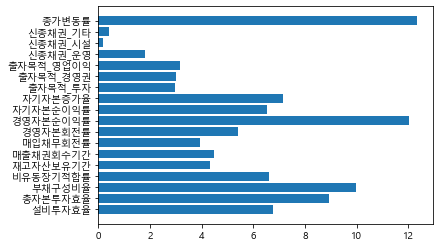

In [52]:
plt.barh(X_train.columns, model.feature_importances_ )